In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert7/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert7/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert7/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert7/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert7/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert7/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/final_audio/data_set_fusion/expert7/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/final_audio/data_set_fusion/expert7/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/final_audio/data_set_fusion/expert7/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')\n"

In [4]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(207, 1653, 207, 1653, 207, 207)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [6]:
len(x_audio_train_prediction),len(x_train_prediction)

(1860, 1860)

In [7]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [9]:
len(df_train)

1860

In [10]:
df_train

,labels
0,5
1,3
2,5
3,3
4,3
...,...
1855,1
1856,1
1857,5
1858,3


In [11]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [12]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,0.000062,0.999659,0.000080,0.000196,0.000003,9.539600e-07,9.203964e-01,5.378347e-02,1.521798e-03,2.405777e-02,1.586962e-04,8.193485e-05
1,0.000869,0.995548,0.000523,0.003042,0.000009,8.922462e-06,6.189468e-06,4.238812e-01,5.761091e-01,3.594934e-06,2.235819e-11,2.386949e-08
2,0.000049,0.000041,0.000020,0.002123,0.001456,9.963111e-01,4.238568e-05,8.242146e-09,5.435681e-05,6.787966e-06,9.122024e-01,8.769407e-02
3,0.000114,0.999223,0.000342,0.000290,0.000023,8.258175e-06,6.573676e-01,2.347927e-01,1.070476e-01,1.266765e-04,5.233891e-04,1.419341e-04
4,0.991302,0.007643,0.000025,0.000973,0.000027,2.944969e-05,3.510085e-02,2.448565e-01,5.023615e-02,6.644048e-01,5.327760e-03,7.393933e-05
...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.000004,0.000058,0.000043,0.009858,0.000075,9.899615e-01,3.324921e-12,4.399423e-06,3.645562e-03,7.355066e-08,2.290855e-09,9.963499e-01
203,0.000990,0.962252,0.035509,0.001156,0.000013,8.015337e-05,3.717093e-07,9.989679e-01,1.031794e-03,4.555096e-10,7.812916e-10,7.091765e-11
204,0.991305,0.007294,0.000021,0.001309,0.000014,5.721731e-05,9.999918e-01,8.981947e-11,7.546583e-11,6.835684e-06,1.353483e-06,9.361896e-08
205,0.000433,0.998711,0.000594,0.000256,0.000005,1.035527e-06,1.780075e-01,5.454309e-01,1.511044e-01,7.345127e-02,4.369416e-03,4.763644e-02


In [13]:
len(x_test),len(x_train)

(207, 1860)

In [14]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,0.000007,0.000007,1.694538e-05,0.000112,0.000117,9.997398e-01,1.387192e-04,2.771353e-06,1.120603e-04,4.898067e-05,2.210067e-04,9.994765e-01
1,0.000014,0.000401,1.076231e-06,0.999402,0.000014,1.689073e-04,1.226334e-08,1.108405e-07,7.288507e-04,9.989219e-01,4.406886e-08,3.490766e-04
2,0.000586,0.000661,7.012845e-05,0.097090,0.001241,9.003514e-01,4.673212e-07,2.941928e-10,3.436124e-10,1.662648e-04,3.308743e-08,9.998332e-01
3,0.000038,0.000159,6.821508e-07,0.999483,0.000044,2.741277e-04,9.910273e-08,7.407110e-11,5.901686e-09,9.999740e-01,4.811433e-06,2.107512e-05
4,0.000034,0.002090,3.303122e-05,0.993146,0.000084,4.613491e-03,2.125222e-04,2.954680e-03,7.055510e-07,9.968263e-01,1.936183e-06,3.913473e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
1855,0.001335,0.996680,1.703442e-03,0.000212,0.000062,7.762030e-06,4.043623e-10,6.588283e-02,9.341170e-01,7.534875e-08,2.476956e-10,8.284928e-13
1856,0.000135,0.999532,1.162601e-04,0.000212,0.000005,9.671194e-07,1.008437e-02,9.891237e-01,2.470985e-06,1.327756e-04,4.750484e-04,1.815893e-04
1857,0.000002,0.000004,8.520990e-06,0.000211,0.000115,9.996591e-01,1.065556e-09,1.896635e-08,2.203337e-04,9.958742e-07,2.758207e-09,9.997787e-01
1858,0.000009,0.000728,1.373353e-06,0.999060,0.000009,1.925414e-04,5.690332e-08,8.852413e-11,1.198114e-08,9.990975e-01,3.625674e-06,8.989621e-04


In [15]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [16]:
len(new_y_train)

1860

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

In [18]:
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape

(array([5, 3, 5, ..., 5, 3, 4]), (1860,))

# training machine learning

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

#print("Restored model, accuracy: {:5.2f}%".format(100*acc))
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(new_x_train,new_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [20]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 1}

In [21]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9973118279569892

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
knn = KNeighborsClassifier(n_neighbors=4)
kn=knn.fit(new_x_train,new_y_train)
predictions = knn.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [23]:
predictions

array([0, 1, 4, 1, 0, 0, 3, 2, 5, 2, 4, 4, 1, 2, 3, 3, 0, 3, 0, 1, 0, 1,
       4, 3, 3, 4, 1, 3, 3, 1, 2, 3, 2, 4, 4, 1, 1, 5, 1, 5, 2, 2, 3, 4,
       1, 3, 0, 2, 1, 2, 2, 5, 4, 1, 4, 5, 1, 5, 1, 1, 5, 4, 4, 1, 2, 3,
       2, 4, 2, 2, 1, 3, 2, 1, 4, 5, 0, 5, 1, 5, 5, 2, 4, 0, 5, 0, 0, 5,
       1, 1, 5, 5, 1, 4, 1, 4, 2, 4, 2, 4, 0, 2, 1, 4, 5, 3, 2, 4, 4, 4,
       5, 3, 3, 1, 1, 1, 2, 1, 5, 3, 4, 0, 4, 5, 2, 1, 4, 3, 3, 0, 5, 3,
       5, 1, 1, 5, 3, 5, 4, 1, 3, 1, 3, 1, 2, 5, 4, 1, 2, 2, 3, 2, 1, 4,
       1, 2, 5, 5, 5, 4, 4, 4, 5, 5, 1, 1, 3, 3, 5, 4, 4, 4, 4, 1, 5, 1,
       1, 3, 5, 2, 0, 4, 5, 1, 3, 5, 3, 1, 2, 5, 4, 3, 5, 1, 3, 4, 2, 0,
       4, 5, 4, 5, 5, 1, 0, 1, 2])

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       0.94      0.94      0.94        48
           2       1.00      0.97      0.98        32
           3       1.00      0.86      0.93        36
           4       0.98      1.00      0.99        40
           5       0.92      0.97      0.95        37

    accuracy                           0.95       207
   macro avg       0.94      0.96      0.95       207
weighted avg       0.96      0.95      0.95       207

----accuracy score 95.16908212560386 ----


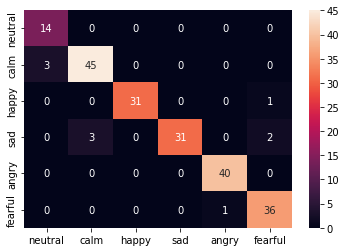

In [24]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','calm', 'happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [25]:
path='/content/drive/My Drive/fusion/fusion_model/KNN/expert7'
savedvX = joblib.dump(knn, path)

print("MODEL SAVED")

MODEL SAVED
